
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.',
       'Diversidades',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varoo natural', 'Varón',
       'Transformer', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre    (sexo cromosómico:  XY)',
       'yo que se que es todo eso masculino',

In [ ]:
df[['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO  \
                                                                 count   
profile_g                                                                
.                                                                  1.0   
Agenero, presentación mujer cis                                    1.0   
Agénero                                                           20.0   
BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES D...                 1.0   
Basta                                                              1.0   
...                                                                ...   
varon bi                                                           1.0   
varon normal                                                       1.0   
varon, no se que es varon cis                                      1.0   
varón                                                              1.0   
yo que se que es todo eso masculino                                1.0   

                                                                              \
                                                         mean            std   
profile_g                                                                      
.                                                    402000.0            NaN   
Agenero, presentación mujer cis                      205000.0            NaN   
Agénero                                              543104.4  746388.945183   
BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES D...   475000.0            NaN   
Basta                                               1340000.0            NaN   
...                                                       ...            ...   
varon bi                                             500000.0            NaN   
varon normal                                         240000.0            NaN   
varon, no se que es varon cis                        222000.0            NaN   
varón                                                   108.0            NaN   
yo que se que es todo eso masculino                   64000.0            NaN   

                                                                          \
                                                          min        25%   
profile_g                                                                  
.                                                    402000.0   402000.0   
Agenero, presentación mujer cis                      205000.0   205000.0   
Agénero                                              130233.0   245000.0   
BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES D...   475000.0   475000.0   
Basta                                               1340000.0  1340000.0   
...                                                       ...        ...   
varon bi                                             500000.0   500000.0   
varon normal                                         240000.0   240000.0   
varon, no se que es varon cis                        222000.0   222000.0   
varón                                                   108.0      108.0   
yo que se que es todo eso masculino                   64000.0    64000.0   

                                                                          \
                                                          50%        75%   
profile_g                                                                  
.                                                    402000.0   402000.0   
Agenero, presentación mujer cis                      205000.0   205000.0   
Agénero                                              353500.0   496500.0   
BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES D...   475000.0   475000.0   
Basta                                               1340000.0  1340000.0   
...                                                       ...        ...   
varon bi                                             500000.0   500000.0   
varon normal                                         240000.0   2400

In [ ]:
df.loc[:,'profile_g'] = df.profile_g.replace({'Varón Cis': 'Varón cis', 'Mujer Cis': 'Mujer cis', 'Varon': 'Varón cis', 'Agénero': 'Diversidades', 'Agenero': 'Diversidades', 'Masculino': 'Varón cis', 'Dolarsexual':'Prefiero no decir', '.':'Prefiero no decir',
       'Diversidades': 'Diversidades',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?': 'Varón cis', 'Hombre, macho silencioso': 'Prefiero no decir', 'Agenero, presentación mujer cis': 'Mujer cis', 'Varón Cis No binario' : 'Diversidades',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.':'Prefiero no decir',
       'Hombre..... tipo normal': 'Varón cis', 'Cis':'Prefiero no decir', 'varon, no se que es varon cis': 'Varón cis',
       'Dejen de preguntar boludeces':'Prefiero no decir', 'Normal':'Prefiero no decir', 'normal':'Prefiero no decir', 'que pelotudos eh':'Prefiero no decir',
       'hombre': 'Varón cis', 'Helicoptero de ataque apache':'Prefiero no decir', 'Varoo natural':'Varón cis', 'Varón':'Varón cis',
       'Transformer':'Prefiero no decir', 'masculino':'Varón cis', 'Hombre':'Varón cis', 'macho silencioso':'Varón cis', 'varón':'Varón cis',
       'no compliquemos lo simple' :'Prefiero no decir', 'Agenero':'Diversidades', 'presentación mujer cis': 'Mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero': 'Diversidades',
       'Macho':'Varón cis', 'Porque tantas opciones? Solo hay 2. Soy hombre.':'Varón cis',
       'heterosexual':'Prefiero no decir', 'Machote':'Varón cis', 'Puto':'Prefiero no decir', 'Gris':'Prefiero no decir', 'Heterosexual':'Prefiero no decir',
       'Hombre    (sexo cromosómico:  XY)':'Varón cis',
       'yo que se que es todo eso masculino':'Varón cis',
       'Insisto, no es tan complicado. ':'Prefiero no decir',
       'No corresponde, es como preguntar la religion o el color de piel':'Prefiero no decir',
       'No entiendo':'Prefiero no decir', 'no entiendo ni mierda q es cada una':'Prefiero no decir',
       'Que? Fluido obvio': 'Diversidades', 'Lesbiana': 'Diversidades', 'Reptiliano':'Prefiero no decir',
       'Que trolo sos para poner esas opciones':'Prefiero no decir', 'Hombre heterosexual':'Varón cis',
       'HETERO':'Prefiero no decir', 'Varon heterosexual':'Varón cis', 'Hombre normal':'Varón cis',
       'mujer de cuando solo existian hombres y mujeres :oP':'Mujer cis',
       'Varón Cis, pero considero ofensivo el término y esta pregunta.':'Varón cis',
       'no entiendo esas clasificaciones':'Prefiero no decir', 'HOMBRE':'Varón cis', 'Varón común':'Varón cis',
       'soy un pollo':'Prefiero no decir', 'Hombre Heterosexual':'Varón cis',
       'me identifico con el eter de alfa centauri en venus con papas':'Prefiero no decir',
       'Hombre Hetero':'Varón cis', 'iddqd':'Prefiero no decir', 'Perro':'Prefiero no decir',
       'heterosexual, pedazos de transtornados... ':'Prefiero no decir', 'Hombre Normal':'Varón cis',
       'varon':'Varón cis', 'Tantas opciones que no supe qué elegir':'Prefiero no decir',
       'Hombre. Varon.':'Varón cis', 'Helicóptero':'Prefiero no decir', 'hetero':'Prefiero no decir',
       'Sin enfermedades psiquiatricas':'Prefiero no decir', 'helicoptero apache':'Prefiero no decir',
       'Hombre. Nada de pelotudeces.':'Varón cis', 'soy mujer':'Mujer cis', 'que pelotudez':'Prefiero no decir',
       'Soy hombre, el resto no se que significa':'Varón cis',
       'Soy una paleta de Carne':'Prefiero no decir',
       'Que ganas de joder. Hombre heterosexual.':'Varón cis', 'Usen castellano...':'Prefiero no decir',
       'Masculino, Hombre, no encontré la opción correcta':'Varón cis',
       'que dificil esta pregunta':'Prefiero no decir',
       'Es hombre o mujer, no caigan en esta pavada':'Prefiero no decir',
       'No deberia ser obligatorio esto':'Prefiero no decir', 'Dolphin':'Prefiero no decir', 'marika':'Prefiero no decir',
       'Hombre con pene':'Varón cis',
       'Varon macho pecho peludo, dejen de agregar tantas opciones lgbtq+qweasdw3':'Varón cis',
       'Esto es una boludes de pregunta. (En la universidad tambien la hacen)':'Prefiero no decir',
       'MASCULINO':'Varón cis', 'hombre varon':'Varón cis',
       'HOMBRE. nada de varon cis ni esas pelotudeces':'Varón cis', 'Varon no Cis': 'Diversidades',
       'un muchacho simple':'Varón cis',
       'Me molestan estas estupideces soy Mujer de nacimiento.':'Mujer cis',
       'Hombre, no tengo ni idea que quiere decir cad aúna de las anteriores opciones ':'Varón cis',
       'Si caigo al hospital con perdida de conocimiento, me van a tratar como lo que soy... Hombre':'Varón cis',
       'hombre de hombre porque soy hombre':'Varón cis', 'en serio?':'Prefiero no decir',
       'Hombre de verdad':'Varón cis', 'Que carajo son todas esos géneros. Hombre.':'Varón cis',
       'Soy hombre':'Varón cis',
       'Varon (tiene que estar como opción, no dar por asumido nada)':'Varón cis',
       'Esto es una boludez':'Prefiero no decir', 'Mujer (nada de cis)':'Mujer cis', 'No se q elegir':'Prefiero no decir',
       'macho machista respetuoso de todes les demas':'Varón cis', 'cis':'Prefiero no decir', 'Hétero':'Prefiero no decir',
       'Hombre a secas':'Varón cis', 'Varón hetero':'Varón cis', 'Tractor multi punto':'Prefiero no decir',
       'que pelotudes...':'Prefiero no decir', 'varon bi':'Diversidades', 'Que boludez es esto':'Prefiero no decir',
       'Pregunto, ¿Qué tiene que ver esto con la temática de la encuesta?':'Prefiero no decir',
       'no se que poner':'Prefiero no decir',
       'me identifico con todos, con el ser humano, soy heterosexual':'Prefiero no decir',
       'hombre clasico':'Varón cis', 'arstotzko':'Prefiero no decir', 'varon normal':'Varón cis', 'Camionero':'Prefiero no decir',
       'Hombre)?':'Varón cis', 'Otaku':'Prefiero no decir', 'Humano':'Prefiero no decir', 'Soy Hombre.':'Varón cis', 'Normal :)':'Prefiero no decir',
       'Hombre Varón':'Varón cis', 'Es broma verdad?':'Prefiero no decir', 'no es relevante':'Prefiero no decir',
       'Varon sin utero':'Varón cis', 'Basta':'Prefiero no decir', 'Hetero':'Prefiero no decir', 'Hiperpiturro':'Prefiero no decir',
       'Varon, sin mas':'Varón cis', 'Pokemón':'Prefiero no decir', 'Pelutudeces NO':'Prefiero no decir',
       'Mujer NB (consejo, quizá podrían hacer un refactor de esta pregunta permitiendo muchas respuestas, así elegiría mujer, NB y trans, mientras que un hombre cis elegiría hombre y cis, sé que no todos en la comunidad IT se toman esto seriamente pero es más correcto y fiel a las experiencias de las personas)':'Diversidades'}).fillna(False)

In [ ]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Prefiero no decir', 'Diversidades'],
      dtype=object)

In [ ]:
df[['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO                                      \
                                count           mean           std    min   
profile_g                                                                   
Diversidades                    116.0  518784.419284  5.472619e+05  212.0   
Mujer cis                       997.0  399137.001083  3.857946e+05    1.0   
Prefiero no decir               293.0  677114.740413  1.401320e+06  139.0   
Varón cis                      4160.0  601051.096702  1.019336e+06    1.0   

                                                             
                        25%       50%       75%         max  
profile_g                                                    
Diversidades       228750.0  365788.0  557250.0   3590000.0  
Mujer cis          198000.0  331022.0  463572.2   3772442.0  
Prefiero no decir  239040.0  410000.0  641109.0  20000000.0  
Varón cis          270000.0  420000.0  621500.0  45000000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_g', 'salary_monthly_NETO']].groupby('profile_g').describe()

salary_monthly_NETO                                        \
                                count           mean           std      min   
profile_g                                                                     
Diversidades                    113.0  532548.610619  5.478384e+05  23000.0   
Mujer cis                       913.0  435832.442530  3.828137e+05   1500.0   
Prefiero no decir               280.0  708536.053821  1.425785e+06   1990.0   
Varón cis                      4007.0  623987.824376  1.031708e+06   1100.0   

                                                                 
                           25%       50%        75%         max  
profile_g                                                        
Diversidades       234475.0000  375000.0  564000.00   3590000.0  
Mujer cis          231000.0000  352000.0  488755.00   3772442.0  
Prefiero no decir  263390.1075  421000.0  651586.25  20000000.0  
Varón cis          290207.0000  430000.0  640000.00  45000000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_g == 'Varón cis'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [ ]:
groupA.describe().round(2)

count        4007.00
mean       623987.82
std       1031708.43
min          1100.00
25%        290207.00
50%        430000.00
75%        640000.00
max      45000000.00
Name: salary_monthly_NETO, dtype: float64

In [ ]:
groupB.describe().round(2)

count        1306.00
mean       502667.00
std        758340.39
min          1500.00
25%        237438.75
50%        365725.00
75%        522224.75
max      20000000.00
Name: salary_monthly_NETO, dtype: float64

In [ ]:
#Estimacion puntual
point_estimate = groupA.mean() - groupB.mean()
point_estimate

121320.81970506691

In [ ]:
#Error estandar de la diferencia de medias
se_difference = numpy.sqrt(numpy.var(groupA, ddof=1)/len(groupA) + numpy.var(groupB, ddof=1)/len(groupB))
se_difference

26570.24130060532

In [ ]:
import scipy
#Intervalo de confianza para la diferencia entre medias
confidence_interval = scipy.stats.norm.interval(1-alpha, loc=point_estimate, scale=se_difference)
confidence_interval

(69244.1036953418, 173397.53571479203)

In [ ]:
print(f"Estimación puntual de la diferencia de medias: {point_estimate}")
print(f"Intervalo de confianza al {1-alpha} nivel: {confidence_interval}")

Estimación puntual de la diferencia de medias: 121320.81970506691
Intervalo de confianza al 0.95 nivel: (69244.1036953418, 173397.53571479203)


Si el intervalo de confianza no incluye el valor cero, no hay suficiente evidencia para rechazar la hipotesis nula

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


H0= No hay diferencia en las medias salariales entre los grupos A y B.


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
# Calcular el estadístico t y el p-valor usando el Test de Welch
t_statistic, p_value = scipy.stats.ttest_ind_from_stats(
    mean1=groupA.mean(), std1=groupA.std(), nobs1= len(groupA),
    mean2=groupB.mean(), std2=groupB.std(), nobs2= len(groupA),
    equal_var=False
)

In [ ]:
print(f"Estadístico t: {t_statistic}")
print(f"P-valor: {p_value}")

Estadístico t: 5.997758486984368
P-valor: 2.095286713684022e-09


In [ ]:
# Decisión basada en el p-valor
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre los grupos A y B.")

Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos A y B.


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= [0.8, 0.9, 0.95]

In [ ]:
sample_sizes = [tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=p,  ratio=ratio) for p in power]

In [ ]:
# Resultados
for p, size in zip(power, sample_sizes):
    print(f"Para un poder estadístico de {p}, el tamaño necesario de la muestra es {size:.2f}")

Para un poder estadístico de 0.8, el tamaño necesario de la muestra es 1249.01
Para un poder estadístico de 0.9, el tamaño necesario de la muestra es 1671.58
Para un poder estadístico de 0.95, el tamaño necesario de la muestra es 2066.93


**RESPUESTA**

Con los tamaños de muestra proporcionadoS:

Para un poder estadístico de 0.8, se necesitarían aproximadamente 1249 participantes.
Para un poder estadístico de 0.9, se necesitarían aproximadamente 1672 participantes.
Para un poder estadístico de 0.95, se necesitarían aproximadamente 2067 participantes.
Estos tamaños de muestra son para asegurar que el test tiene una alta probabilidad de detectar una diferencia real entre los grupos, si existe, con el nivel de poder estadístico deseado. Dado que LAS muestras actuales (4007 para el grupo A y 1306 para el grupo B) son mayores que los tamaños de muestra necesarios para los poderes estadísticos Calculados, podemos concluir que las muestras son suficientemente grandes para detectar diferencias significativas entre los grupos.


En resumen, basándonos en los tamaños de muestras, parece que el estudio tiene un poder estadístico adecuado para ser representativo de la tendencia general y podría considerarse suficientemente robusto para ser usado eb un juicio penal, siempre y cuando se cumplan todos los requisitos legales y éticos pertinentes.





## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


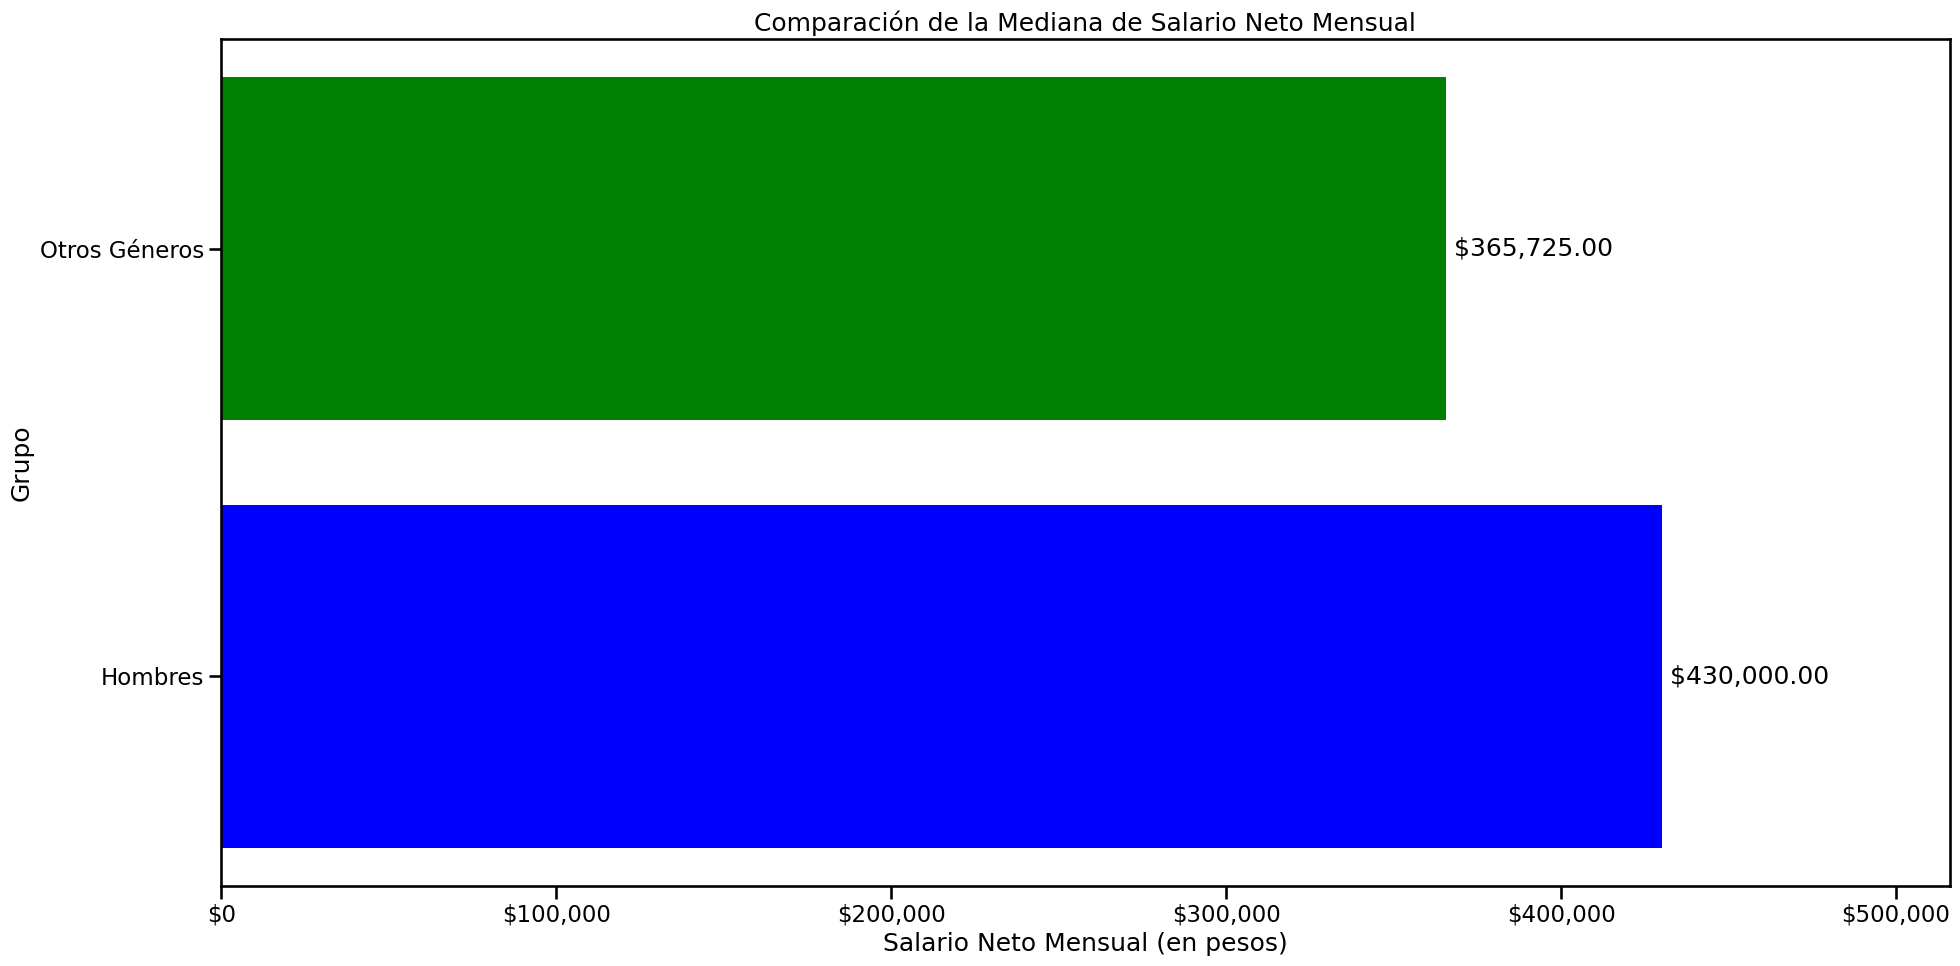

In [ ]:
import matplotlib.ticker as ticker
salaries = {'Hombres': 430000, 'Otros Géneros': 365725}
names = list(salaries.keys())
values = list(salaries.values())


plt.figure(figsize=(20, 10))
bars = plt.barh(names, values, color=['blue', 'green'])


for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f' ${bar.get_width():,.2f}',
        va='center', ha='left'
    )


plt.title('Comparación de la Mediana de Salario Neto Mensual')
plt.xlabel('Salario Neto Mensual (en pesos)')
plt.ylabel('Grupo')

plt.xlim(0, max(values) * 1.2)

formatter = ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)



plt.tight_layout()
plt.show()